In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import neattext.functions as nfx
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.multioutput import MultiOutputClassifier
import joblib

In [2]:
movies = pd.read_csv('netflix_titles.csv')

In [3]:
movies

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
# Drop Null Values
movies=movies.dropna().reset_index(drop=True)

In [6]:
movies

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
1,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
2,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
3,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
4,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
...,...,...,...,...,...,...,...,...,...,...,...,...
5327,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
5328,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
5329,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
5330,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [7]:
#Analysing IMDB ratings to get top rated movies on Netflix
imdb_ratings=pd.read_csv("IMDb ratings.csv", usecols=['weighted_average_vote'])
imdb_titles=pd.read_csv('IMDb movies.csv', usecols=['title','year','genre'])

ratings = pd.DataFrame({'Title':imdb_titles.title,
                    'Release Year':imdb_titles.year,
                    'Rating': imdb_ratings.weighted_average_vote,
                    'Genre':imdb_titles.genre})
ratings.drop_duplicates(subset=['Title','Release Year','Rating'], inplace=True)

In [8]:
#joining netflix dataset and imdb dataset
ratings.dropna()
joint_data=ratings.merge(movies,left_on='Title',right_on='title',how='inner')
final_data=joint_data.sort_values(by='Rating', ascending=False)

In [9]:
final_data

,Title,Release Year,Rating,Genre,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
833,Innocent,2017,9.0,Comedy,s4175,TV Show,Innocent,Seren Yüce,"Ali Atay, Haluk Bilginer, Nur Sürer, Okan Yala...",Turkey,"January 23, 2019",2017,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In a peaceful, rustic town, a retired officer ..."
321,Pulp Fiction,1994,8.9,"Crime, Drama",s7803,Movie,Pulp Fiction,Quentin Tarantino,"John Travolta, Samuel L. Jackson, Uma Thurman,...",United States,"January 1, 2019",1994,R,154 min,"Classic Movies, Cult Movies, Dramas",This stylized crime caper weaves together stor...
310,Schindler's List,1993,8.9,"Biography, Drama, History",s7958,Movie,Schindler's List,Steven Spielberg,"Liam Neeson, Ben Kingsley, Ralph Fiennes, Caro...",United States,"April 1, 2018",1993,R,195 min,"Classic Movies, Dramas",Oskar Schindler becomes an unlikely humanitari...
1134,Inception,2010,8.8,"Action, Adventure, Sci-Fi",s341,Movie,Inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...","United States, United Kingdom","August 1, 2021",2010,PG-13,148 min,"Action & Adventure, Sci-Fi & Fantasy, Thrillers",A troubled thief who extracts secrets from peo...
515,Koshish,1972,8.6,Drama,s7225,Movie,Koshish,Gulzar,"Sanjeev Kumar, Jaya Bhaduri, Asrani, Seema, Om...",India,"December 31, 2019",1972,TV-14,115 min,"International Movies, Romantic Movies",A speech and hearing-impaired couple persists ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,Ride or Die,2005,1.7,"Action, Western",s1051,Movie,Ride or Die,Ryuichi Hiroki,"Kiko Mizuhara, Honami Sato, Yoko Maki, Anne Su...",Japan,"April 15, 2021",2021,TV-MA,143 min,"Dramas, International Movies, LGBTQ Movies",Rei helps the woman she’s been in love with fo...
496,Himmatwala,2013,1.7,"Action, Comedy",s4443,Movie,Himmatwala,Sajid Khan,"Ajay Devgn, Tamannaah Bhatia, Paresh Rawal, Za...",India,"November 1, 2018",2013,TV-14,140 min,"Action & Adventure, Comedies, International Mo...",A young man returns to his native village on a...
1509,Welcome to New York,2018,1.6,"Comedy, Drama",s8716,Movie,Welcome to New York,Abel Ferrara,"Gérard Depardieu, Jacqueline Bisset, Marie Mou...","United States, France","March 23, 2017",2014,R,108 min,"Dramas, Independent Movies",A lecherous World Bank official sees his reput...
1040,Pink,2016,1.6,"Comedy, Drama",s5630,Movie,Pink,Aniruddha Roy Chowdhury,"Tapsee Pannu, Kirti Kulhari, Andrea Tariang, A...",India,"January 20, 2017",2016,TV-14,130 min,"Dramas, International Movies","A sexual assault victim, unjustly tried for th..."


In [10]:
#Identify the unique values
dict = {}
for i in list(final_data.columns):
    dict[i] = final_data[i].value_counts().shape[0]
    
print(pd.DataFrame(dict,index = ["Unique counts"]).transpose())

              Unique counts
Title                  2091
Release Year            101
Rating                   73
Genre                   305
show_id                2091
type                      2
title                  2091
director               1729
cast                   2090
country                 303
date_added              862
release_year             59
rating                   13
duration                136
listed_in               205
description            2090


In [11]:
#Identify the missing values

temp = final_data.isnull().sum()
uniq = pd.DataFrame({'Columns': temp.index, 'Missing values': temp.values})
uniq

,Columns,Missing values
0,Title,0
1,Release Year,0
2,Rating,0
3,Genre,0
4,show_id,0
5,type,0
6,title,0
7,director,0
8,cast,0
9,country,0


In [12]:
netflix_shows=final_data[final_data['type']=='TV Show']
netflix_movies=final_data[final_data['type']=='Movie']

Text(0.5, 1.0, 'TV Shows VS Movies')

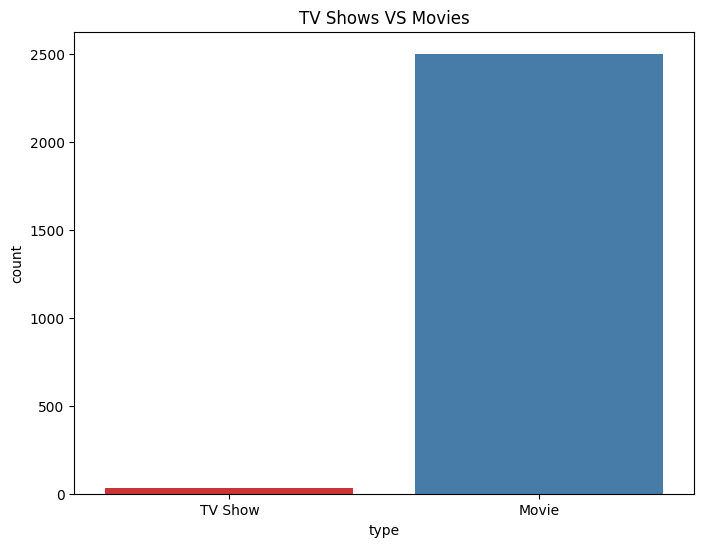

In [13]:
plt.figure(figsize=(8,6))
ax= sns.countplot(x = "type", data = final_data,palette="Set1")
ax.set_title("TV Shows VS Movies")

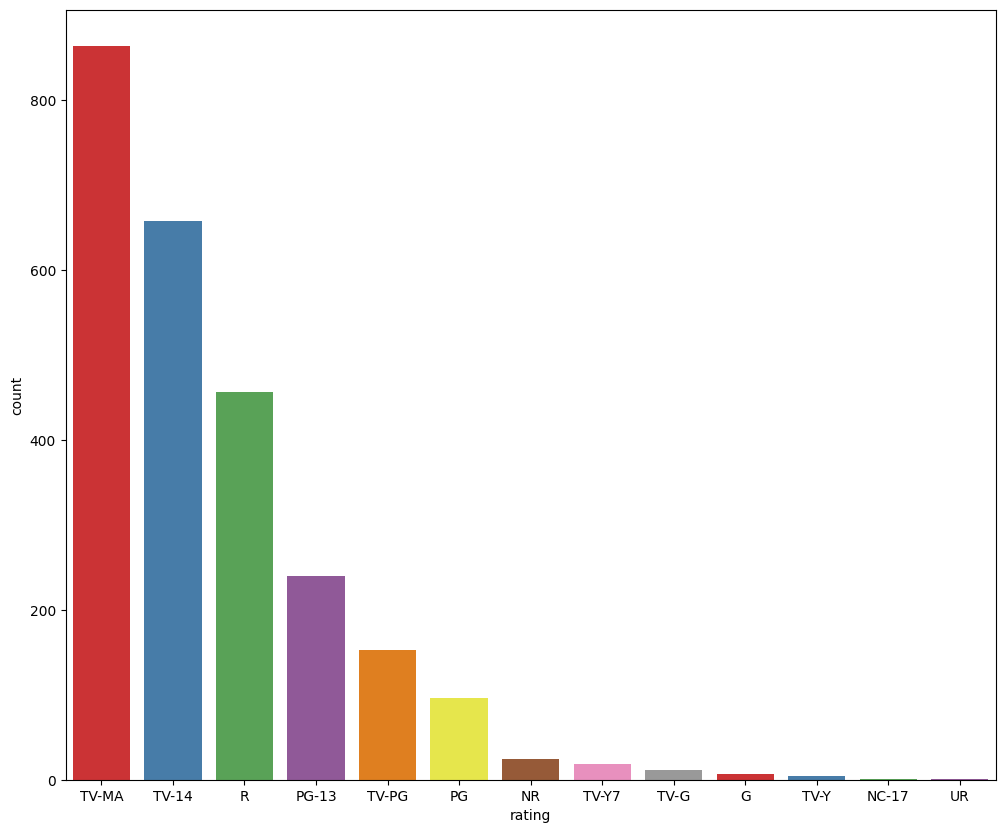

In [14]:
#Movie Rating
plt.figure(figsize=(12,10))
ax = sns.countplot(x="rating", data=final_data,palette="Set1",order=final_data['rating'].value_counts().index[0:15]) 

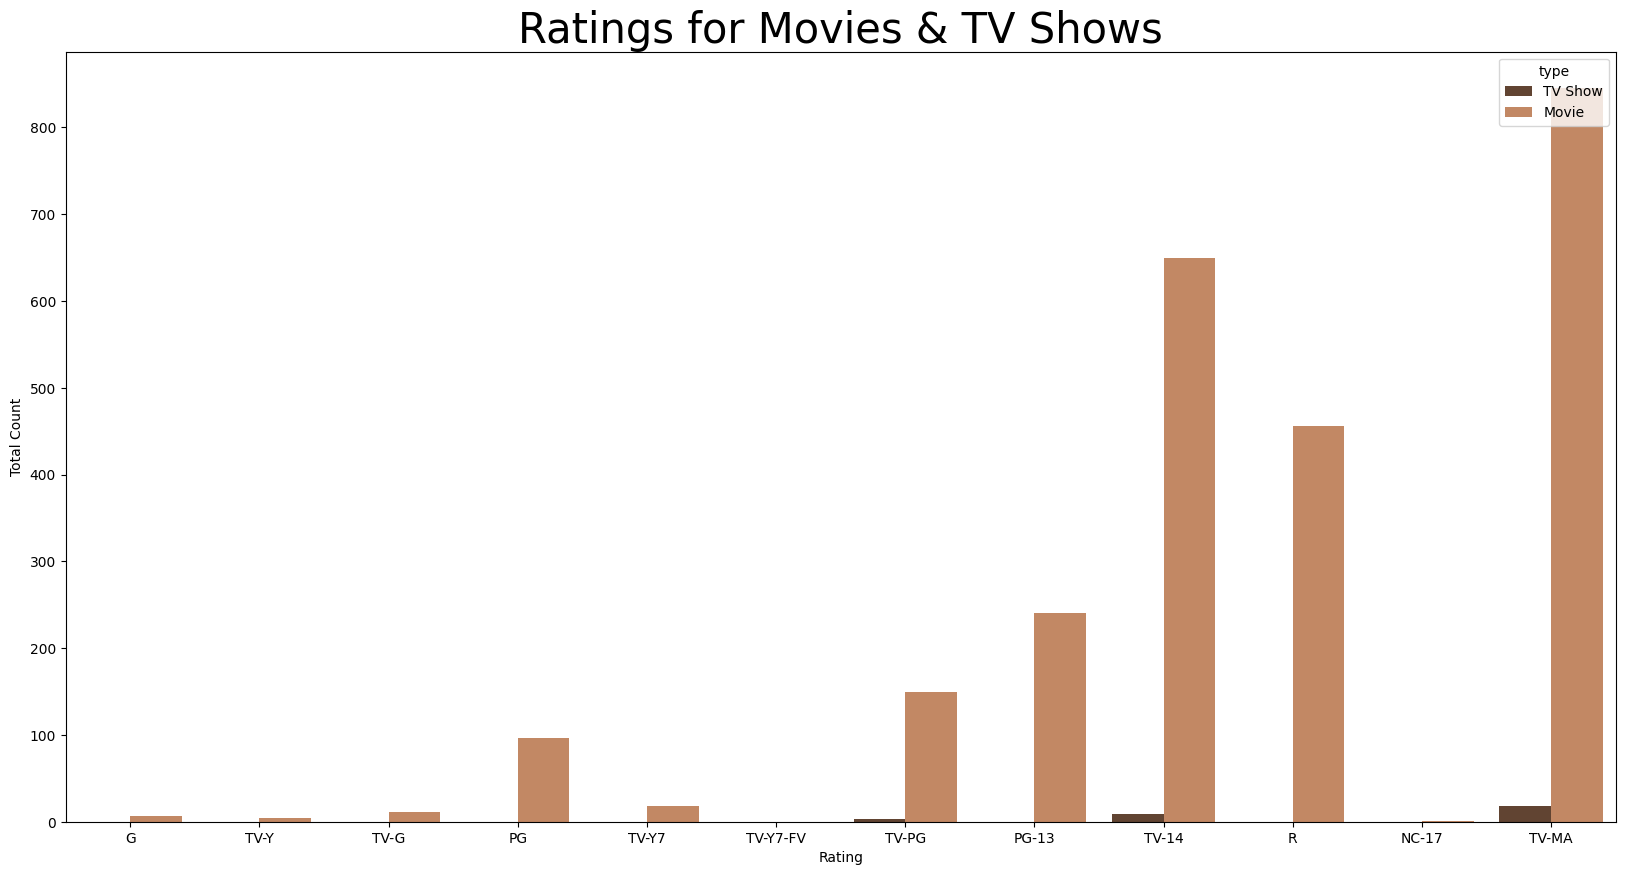

In [15]:
order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
plt.figure(figsize=(20,10))
g = sns.countplot(final_data.rating, hue=final_data.type, order=order, palette="copper");
plt.title("Ratings for Movies & TV Shows", fontsize=30)
plt.xlabel("Rating")
plt.ylabel("Total Count")
plt.show()

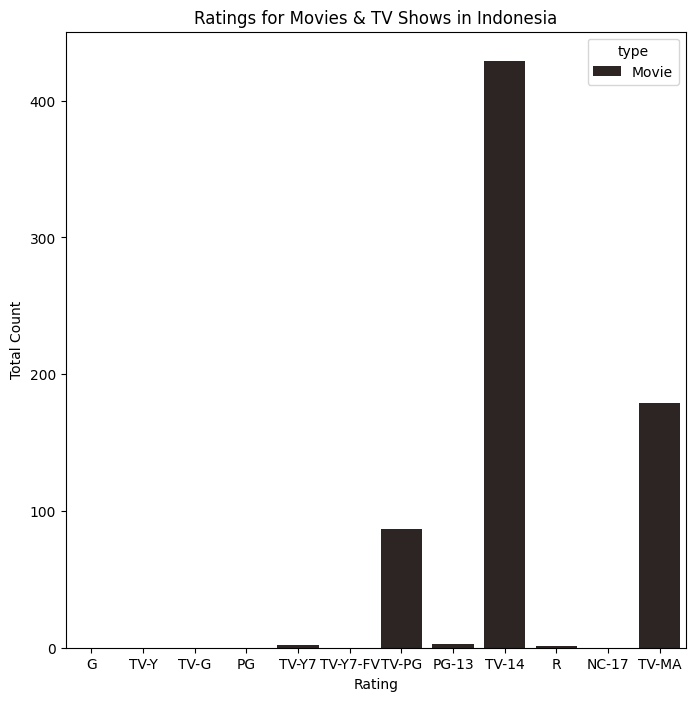

In [16]:
IND = final_data[final_data.country == "India"]
order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
plt.figure(figsize=(8,8))
g = sns.countplot(IND.rating, hue=IND.type, order=order, palette="dark:brown");
plt.title("Ratings for Movies & TV Shows in Indonesia")
plt.xlabel("Rating")
plt.ylabel("Total Count")
plt.show()

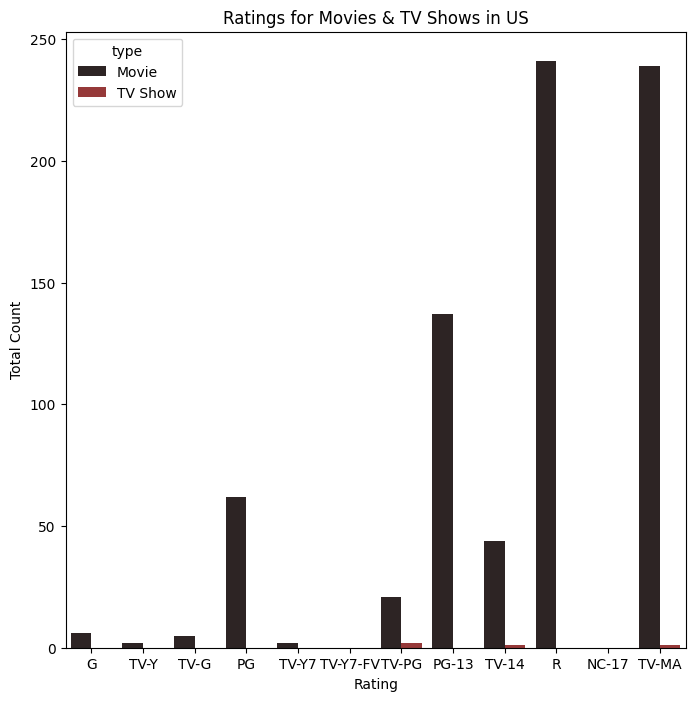

In [17]:
US = final_data[final_data.country == "United States"]
order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
plt.figure(figsize=(8,8))
g = sns.countplot(US.rating, hue=US.type, order=order, palette="dark:brown");
plt.title("Ratings for Movies & TV Shows in US")
plt.xlabel("Rating")
plt.ylabel("Total Count")
plt.show()

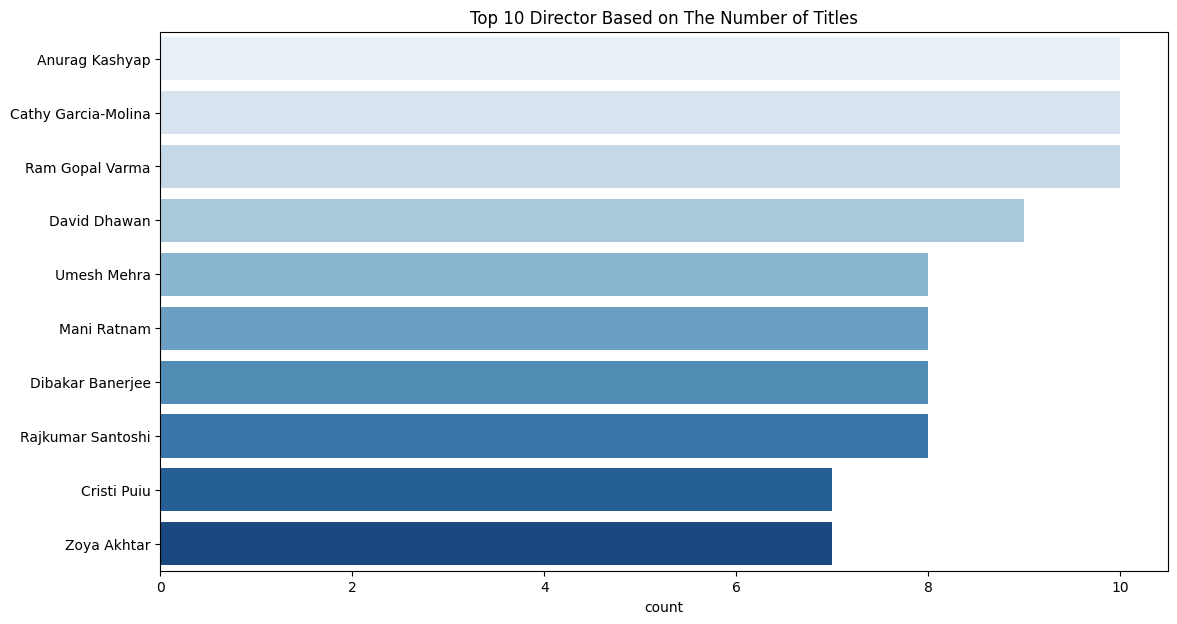

In [18]:
filtered_directors = final_data[final_data.director != 'No Director'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Top 10 Director Based on The Number of Titles')
sns.countplot(y = filtered_directors, order=filtered_directors.value_counts().index[:10], palette='Blues')
plt.show()

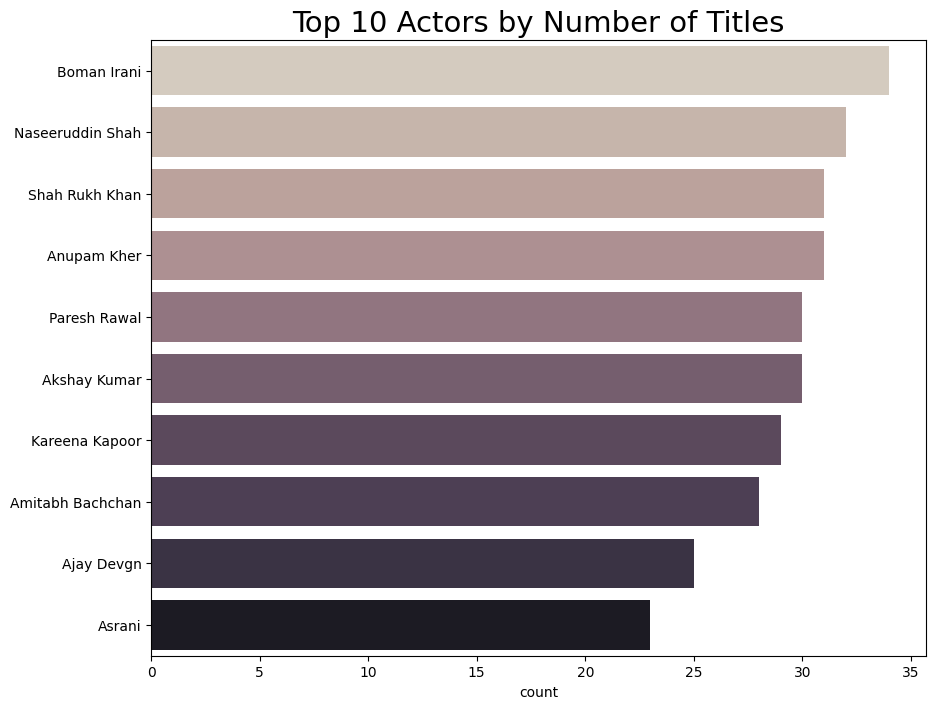

In [19]:
plt.figure(figsize=(10,8))
netflix_cast = final_data[final_data.cast != 'cast unavailable'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y = netflix_cast, order=netflix_cast.value_counts().index[:10], palette='magma_r', saturation=.2)
plt.title('Top 10 Actors by Number of Titles', fontsize=21);
plt.show()

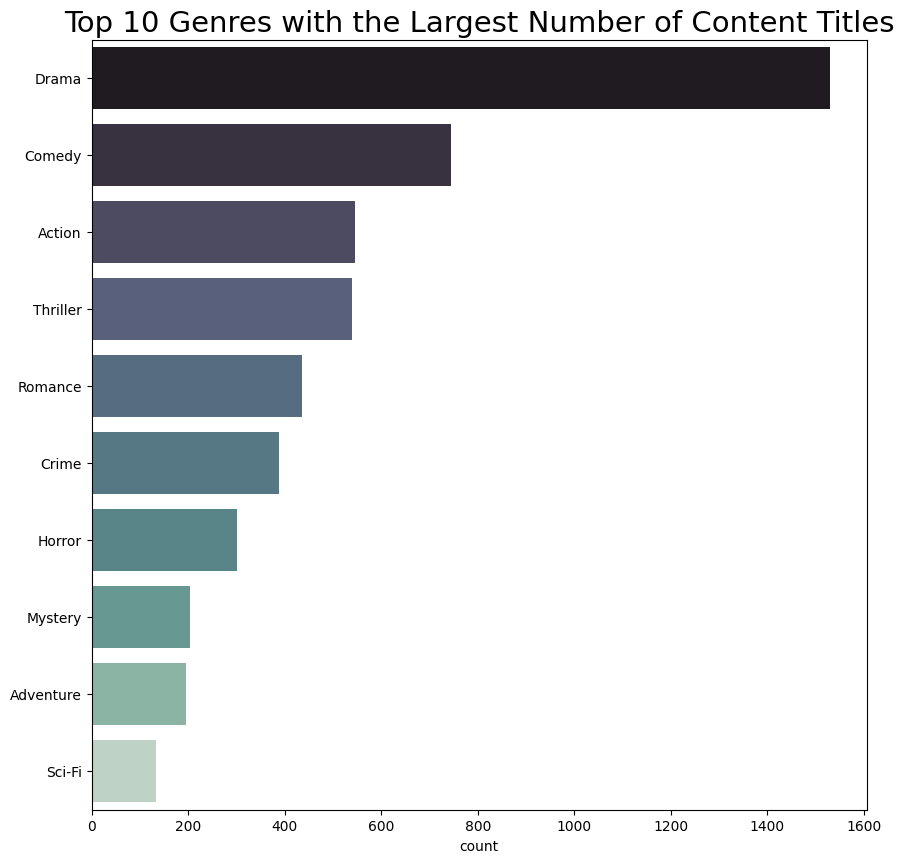

In [20]:
top_genres = final_data.set_index('title').Genre.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(10, 10))
sns.countplot(y=top_genres, order=top_genres.value_counts().index.to_list()[:10], palette='mako', saturation=.4)
plt.title('Top 10 Genres with the Largest Number of Content Titles', fontsize=21);

In [21]:
country_count=final_data['country'].value_counts().sort_values(ascending=False)
country_count = pd.DataFrame({'Country': country_count.index, 'Shows': country_count.values})
topcountries=country_count[0:11]
topcountries

,Country,Shows
0,United States,774
1,India,704
2,United Kingdom,64
3,Philippines,50
4,Canada,46
5,Indonesia,38
6,Spain,35
7,Nigeria,31
8,"United Kingdom, United States",29
9,France,25


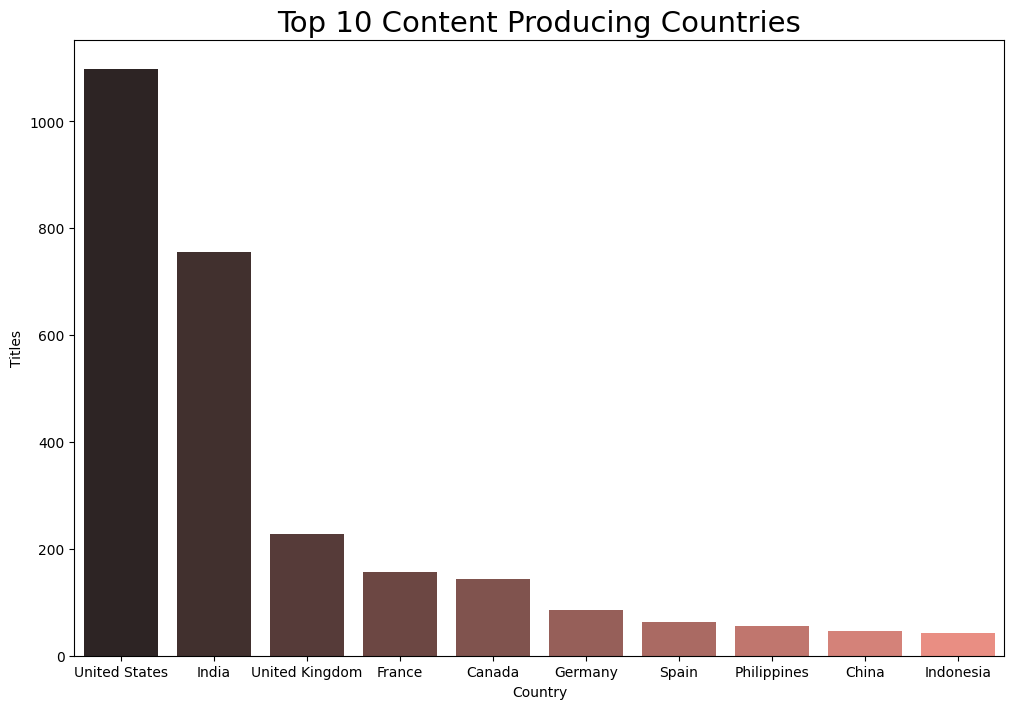

In [22]:
Countries = final_data.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
Countries = Countries[Countries != 'production country unavailable']
plt.figure(figsize=(12,8))
g = sns.countplot(x = Countries, order=Countries.value_counts().index[:10], palette='dark:salmon')
plt.title('Top 10 Content Producing Countries', fontsize=21)
plt.xlabel('Country')
plt.ylabel('Titles')
plt.show()

In [23]:
Last_fifteen_years = final_data[final_data['release_year']>2000 ]
Last_fifteen_years.head()

,Title,Release Year,Rating,Genre,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
833,Innocent,2017,9.0,Comedy,s4175,TV Show,Innocent,Seren Yüce,"Ali Atay, Haluk Bilginer, Nur Sürer, Okan Yala...",Turkey,"January 23, 2019",2017,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In a peaceful, rustic town, a retired officer ..."
1134,Inception,2010,8.8,"Action, Adventure, Sci-Fi",s341,Movie,Inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...","United States, United Kingdom","August 1, 2021",2010,PG-13,148 min,"Action & Adventure, Sci-Fi & Fantasy, Thrillers",A troubled thief who extracts secrets from peo...
946,Oththa Seruppu Size 7,2019,8.6,Drama,s3313,Movie,Oththa Seruppu Size 7,Parthiban,Parthiban,India,"November 4, 2019",2019,TV-MA,103 min,"Dramas, International Movies, Thrillers","Taken into custody, a murder suspect's theatri..."
1777,Eh Janam Tumhare Lekhe,2015,8.6,Biography,s6668,Movie,Eh Janam Tumhare Lekhe,Harjit Singh,"Pavan Malhotra, Sudhanshu Aggarwal, Arjuna Bha...",India,"December 1, 2017",2015,TV-14,124 min,"Dramas, International Movies",Driven by the lessons he learned from his moth...
2460,Ani... Dr. Kashinath Ghanekar,2018,8.6,Drama,s2017,Movie,Ani... Dr. Kashinath Ghanekar,Abhijeet Deshpande,"Subodh Bhave, Vaidehi Parshurami, Nandita Patk...",India,"September 10, 2020",2018,TV-14,157 min,"Dramas, International Movies",From his singular career to his personal demon...


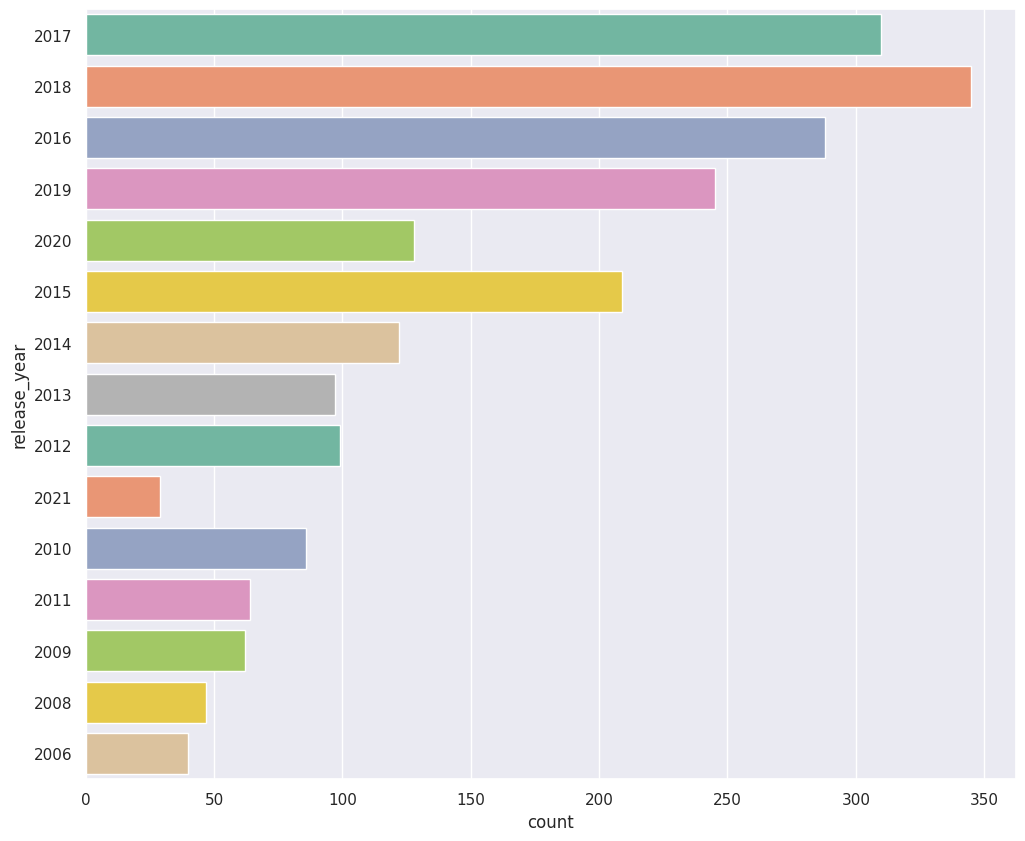

In [24]:
#Year wise analysis in graph
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=Last_fifteen_years, palette="Set2", order=movies['release_year'].value_counts().index[0:15])

In [25]:
netflix_movies['duration']=netflix_movies['duration'].str.replace(' min','')
netflix_movies['duration']
netflix_movies['duration']=netflix_movies['duration'].astype(str).astype(int)
netflix_movies['duration']

321     154
310     195
1134    148
515     115
946     103
       ... 
805     143
496     140
1509    108
1040    130
1994     90
Name: duration, Length: 2502, dtype: int64

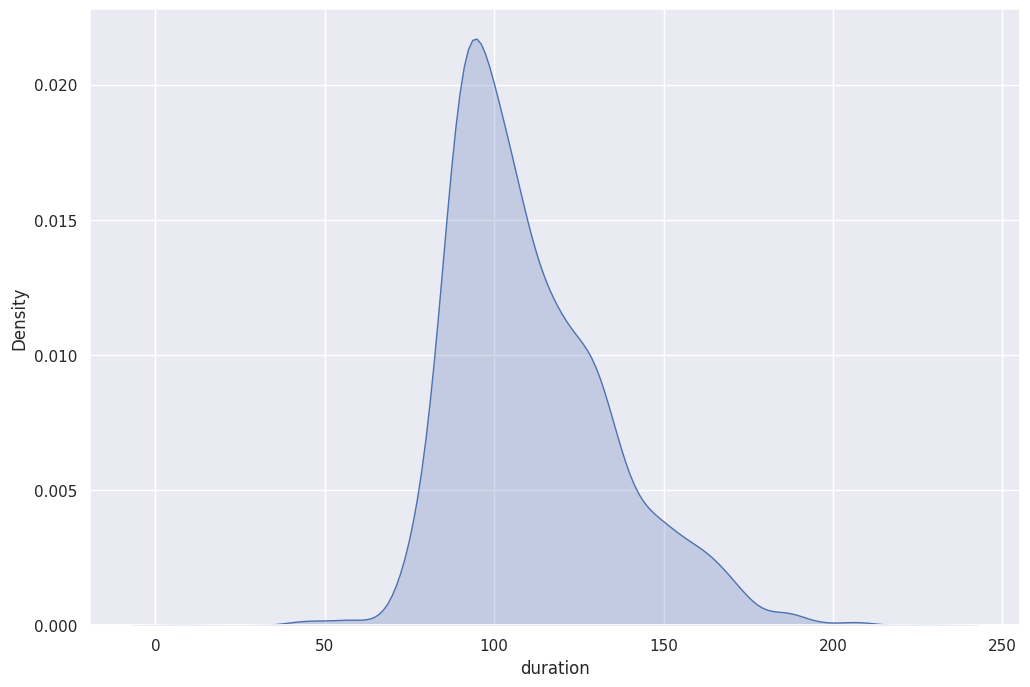

In [26]:
sns.set(style="darkgrid")
plt.figure(figsize=(12,8))
ax=sns.kdeplot(data=netflix_movies['duration'], shade=True)

In [27]:
features=['title','duration']
durations= netflix_shows[features]
durations['no_of_seasons']=durations['duration'].str.replace(' Season','')
durations['no_of_seasons']=durations['no_of_seasons'].str.replace('s','')

In [28]:
durations['no_of_seasons']=durations['no_of_seasons'].astype(str).astype(int)

In [29]:
#TV shows with largest number of seasons
t=['title','no_of_seasons']
top=durations[t]

top=top.sort_values(by='no_of_seasons', ascending=False)

<AxesSubplot: xlabel='title'>

<Figure size 1000x800 with 0 Axes>

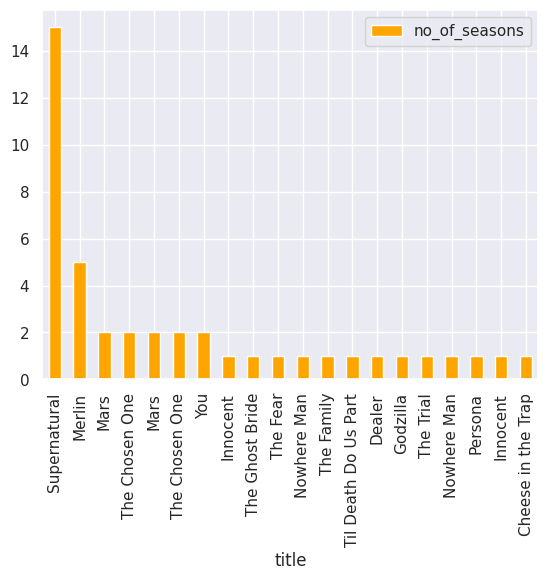

In [30]:
top20=top[0:20]
plt.figure(figsize=(10,8))
top20.plot(kind='bar',x='title',y='no_of_seasons', color='orange')

In [31]:
#Plot description based Recommender

final_data['description'].head()

833     In a peaceful, rustic town, a retired officer ...
321     This stylized crime caper weaves together stor...
310     Oskar Schindler becomes an unlikely humanitari...
1134    A troubled thief who extracts secrets from peo...
515     A speech and hearing-impaired couple persists ...
Name: description, dtype: object

In [32]:
#Recommedation System(Content Based)

#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a', etc.
tfidf = TfidfVectorizer(stop_words='english')

#Replacing NaN with an empty string
final_data['description'] = final_data['description'].fillna('')

#Constructing the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(final_data['description'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(2532, 7962)

In [33]:
#tfidf_matrix.nonzero()
from sklearn.metrics.pairwise import linear_kernel

#compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix,tfidf_matrix)

In [34]:
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.10467979,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.02881154, 0.        ,
        0.02823733],
       ...,
       [0.        , 0.        , 0.02881154, ..., 1.        , 0.        ,
        0.031196  ],
       [0.10467979, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.02823733, ..., 0.031196  , 0.        ,
        1.        ]])

In [35]:
#construct a reverse map if indices and mivie titles
indices = pd.Series(final_data.index, index = final_data['title']).drop_duplicates()

In [36]:
indices

title
Innocent                833
Pulp Fiction            321
Schindler's List        310
Inception              1134
Koshish                 515
                       ... 
Ride or Die             805
Himmatwala              496
Welcome to New York    1509
Pink                   1040
Aerials                1994
Length: 2532, dtype: int64

In [37]:
# Function that takes in movie title as input and outputs most similar movies
# we will use cosine similarity instead of Euclidian distance. because what will be used for calculation is the angle between the vectors 
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return final_data['title'].iloc[movie_indices]

In [38]:
get_recommendations('Black Panther')

1659              Hungerford
320     Kabhi Haan Kabhi Naa
1135                  Race 2
1473          Sweet Virginia
630                  Justice
631                  Justice
273                   Ghayal
912            The Lovebirds
911            The Lovebirds
2310      The Burial of Kojo
Name: title, dtype: object

In [39]:
#Filling null values with empty string.
filledna=final_data.fillna('')

In [40]:
filledna

,Title,Release Year,Rating,Genre,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
833,Innocent,2017,9.0,Comedy,s4175,TV Show,Innocent,Seren Yüce,"Ali Atay, Haluk Bilginer, Nur Sürer, Okan Yala...",Turkey,"January 23, 2019",2017,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In a peaceful, rustic town, a retired officer ..."
321,Pulp Fiction,1994,8.9,"Crime, Drama",s7803,Movie,Pulp Fiction,Quentin Tarantino,"John Travolta, Samuel L. Jackson, Uma Thurman,...",United States,"January 1, 2019",1994,R,154 min,"Classic Movies, Cult Movies, Dramas",This stylized crime caper weaves together stor...
310,Schindler's List,1993,8.9,"Biography, Drama, History",s7958,Movie,Schindler's List,Steven Spielberg,"Liam Neeson, Ben Kingsley, Ralph Fiennes, Caro...",United States,"April 1, 2018",1993,R,195 min,"Classic Movies, Dramas",Oskar Schindler becomes an unlikely humanitari...
1134,Inception,2010,8.8,"Action, Adventure, Sci-Fi",s341,Movie,Inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...","United States, United Kingdom","August 1, 2021",2010,PG-13,148 min,"Action & Adventure, Sci-Fi & Fantasy, Thrillers",A troubled thief who extracts secrets from peo...
515,Koshish,1972,8.6,Drama,s7225,Movie,Koshish,Gulzar,"Sanjeev Kumar, Jaya Bhaduri, Asrani, Seema, Om...",India,"December 31, 2019",1972,TV-14,115 min,"International Movies, Romantic Movies",A speech and hearing-impaired couple persists ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,Ride or Die,2005,1.7,"Action, Western",s1051,Movie,Ride or Die,Ryuichi Hiroki,"Kiko Mizuhara, Honami Sato, Yoko Maki, Anne Su...",Japan,"April 15, 2021",2021,TV-MA,143 min,"Dramas, International Movies, LGBTQ Movies",Rei helps the woman she’s been in love with fo...
496,Himmatwala,2013,1.7,"Action, Comedy",s4443,Movie,Himmatwala,Sajid Khan,"Ajay Devgn, Tamannaah Bhatia, Paresh Rawal, Za...",India,"November 1, 2018",2013,TV-14,140 min,"Action & Adventure, Comedies, International Mo...",A young man returns to his native village on a...
1509,Welcome to New York,2018,1.6,"Comedy, Drama",s8716,Movie,Welcome to New York,Abel Ferrara,"Gérard Depardieu, Jacqueline Bisset, Marie Mou...","United States, France","March 23, 2017",2014,R,108 min,"Dramas, Independent Movies",A lecherous World Bank official sees his reput...
1040,Pink,2016,1.6,"Comedy, Drama",s5630,Movie,Pink,Aniruddha Roy Chowdhury,"Tapsee Pannu, Kirti Kulhari, Andrea Tariang, A...",India,"January 20, 2017",2016,TV-14,130 min,"Dramas, International Movies","A sexual assault victim, unjustly tried for th..."


In [41]:
#Cleaning the data - making all the words lower case
def clean_data(x):
        return str.lower(x.replace(" ", ""))

In [42]:
#Identifying features on which the model is to be filtered.
features=['title','director','cast','listed_in','description']
filledna=filledna[features]

In [43]:
for feature in features:
    filledna[feature] = filledna[feature].apply(clean_data)
    
filledna

,title,director,cast,listed_in,description
833,innocent,serenyüce,"aliatay,halukbilginer,nursürer,okanyalabık,tül...","crimetvshows,internationaltvshows,tvdramas","inapeaceful,rustictown,aretiredofficerandhisfa..."
321,pulpfiction,quentintarantino,"johntravolta,samuell.jackson,umathurman,harvey...","classicmovies,cultmovies,dramas",thisstylizedcrimecaperweavestogetherstoriesfea...
310,schindler'slist,stevenspielberg,"liamneeson,benkingsley,ralphfiennes,carolinego...","classicmovies,dramas","oskarschindlerbecomesanunlikelyhumanitarian,sp..."
1134,inception,christophernolan,"leonardodicaprio,josephgordon-levitt,elliotpag...","action&adventure,sci-fi&fantasy,thrillers",atroubledthiefwhoextractssecretsfrompeople'sdr...
515,koshish,gulzar,"sanjeevkumar,jayabhaduri,asrani,seema,omshivpu...","internationalmovies,romanticmovies",aspeechandhearing-impairedcouplepersiststhroug...
...,...,...,...,...,...
805,rideordie,ryuichihiroki,"kikomizuhara,honamisato,yokomaki,annesuzuki,te...","dramas,internationalmovies,lgbtqmovies",reihelpsthewomanshe’sbeeninlovewithforyearsesc...
496,himmatwala,sajidkhan,"ajaydevgn,tamannaahbhatia,pareshrawal,zarinawa...","action&adventure,comedies,internationalmovies",ayoungmanreturnstohisnativevillageonamissionof...
1509,welcometonewyork,abelferrara,"gérarddepardieu,jacquelinebisset,mariemouté,pa...","dramas,independentmovies",alecherousworldbankofficialseeshisreputationcr...
1040,pink,aniruddharoychowdhury,"tapseepannu,kirtikulhari,andreatariang,amitabh...","dramas,internationalmovies","asexualassaultvictim,unjustlytriedfortheattemp..."


In [44]:
def create_soup(x):
    return x['title']+ ' ' + x['director'] + ' ' + x['cast'] + ' ' +x['listed_in']+' '+ x['description']

filledna['soup'] = filledna.apply(create_soup, axis=1)

In [45]:
filledna['soup'][1:11]

321     pulpfiction quentintarantino johntravolta,samu...
310     schindler'slist stevenspielberg liamneeson,ben...
1134    inception christophernolan leonardodicaprio,jo...
515     koshish gulzar sanjeevkumar,jayabhaduri,asrani...
946     oththaseruppusize7 parthiban parthiban dramas,...
174     golmaal hrishikeshmukherjee amolpalekar,bindiy...
1777    ehjanamtumharelekhe harjitsingh pavanmalhotra,...
2460    ani...dr.kashinathghanekar abhijeetdeshpande s...
610     cityofgod fernandomeirelles,katialund alexandr...
1488    muchadoaboutnothing alejandrofernándezalmendra...
Name: soup, dtype: object

In [46]:
filledna

,title,director,cast,listed_in,description,soup
833,innocent,serenyüce,"aliatay,halukbilginer,nursürer,okanyalabık,tül...","crimetvshows,internationaltvshows,tvdramas","inapeaceful,rustictown,aretiredofficerandhisfa...","innocent serenyüce aliatay,halukbilginer,nursü..."
321,pulpfiction,quentintarantino,"johntravolta,samuell.jackson,umathurman,harvey...","classicmovies,cultmovies,dramas",thisstylizedcrimecaperweavestogetherstoriesfea...,"pulpfiction quentintarantino johntravolta,samu..."
310,schindler'slist,stevenspielberg,"liamneeson,benkingsley,ralphfiennes,carolinego...","classicmovies,dramas","oskarschindlerbecomesanunlikelyhumanitarian,sp...","schindler'slist stevenspielberg liamneeson,ben..."
1134,inception,christophernolan,"leonardodicaprio,josephgordon-levitt,elliotpag...","action&adventure,sci-fi&fantasy,thrillers",atroubledthiefwhoextractssecretsfrompeople'sdr...,"inception christophernolan leonardodicaprio,jo..."
515,koshish,gulzar,"sanjeevkumar,jayabhaduri,asrani,seema,omshivpu...","internationalmovies,romanticmovies",aspeechandhearing-impairedcouplepersiststhroug...,"koshish gulzar sanjeevkumar,jayabhaduri,asrani..."
...,...,...,...,...,...,...
805,rideordie,ryuichihiroki,"kikomizuhara,honamisato,yokomaki,annesuzuki,te...","dramas,internationalmovies,lgbtqmovies",reihelpsthewomanshe’sbeeninlovewithforyearsesc...,"rideordie ryuichihiroki kikomizuhara,honamisat..."
496,himmatwala,sajidkhan,"ajaydevgn,tamannaahbhatia,pareshrawal,zarinawa...","action&adventure,comedies,internationalmovies",ayoungmanreturnstohisnativevillageonamissionof...,"himmatwala sajidkhan ajaydevgn,tamannaahbhatia..."
1509,welcometonewyork,abelferrara,"gérarddepardieu,jacquelinebisset,mariemouté,pa...","dramas,independentmovies",alecherousworldbankofficialseeshisreputationcr...,"welcometonewyork abelferrara gérarddepardieu,j..."
1040,pink,aniruddharoychowdhury,"tapseepannu,kirtikulhari,andreatariang,amitabh...","dramas,internationalmovies","asexualassaultvictim,unjustlytriedfortheattemp...","pink aniruddharoychowdhury tapseepannu,kirtiku..."


In [47]:
# TAGS creation

# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

# Remove Stop-words
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(filledna['soup'])

# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

# Reset index of our main DataFrame and construct reverse mapping as before
filledna=filledna.reset_index()
indices = pd.Series(filledna.index, index=filledna['title'])

In [48]:
# Given every movies or show an index number
indices

title
innocent               0
pulpfiction            1
schindler'slist        2
inception              3
koshish                4
                    ... 
rideordie           2527
himmatwala          2528
welcometonewyork    2529
pink                2530
aerials             2531
Length: 2532, dtype: int64

In [49]:
def get_recommendations_new(title, cosine_sim=cosine_sim):
    title=title.replace(' ','').lower()
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return final_data['title'].iloc[movie_indices]

In [50]:
get_recommendations_new('Welcome', cosine_sim2)

1202        Tees Maar Khan
1709         The Shaukeens
284                  Joker
283                  Joker
1139    Dhoondte Reh Jaoge
281                  Joker
282                  Joker
743                Aitraaz
1256             Thank You
745        Phir Hera Pheri
Name: title, dtype: object

In [51]:
get_recommendations_new('Black Panther', cosine_sim2)

2293                      Singularity
757                              Next
346                       Dragonheart
186               Alibaba Aur 40 Chor
1263              Season of the Witch
531                       Equilibrium
324                          Stargate
244                        Underworld
2031    Kingsglaive: Final Fantasy XV
408                   Men in Black II
Name: title, dtype: object

In [52]:
get_recommendations_new('Andhadhun', cosine_sim2)

2252               Bareilly Ki Barfi
1910                      Bombairiya
399                          Soldier
398                          Soldier
2329             Sudani from Nigeria
2272                         Muramba
1692                 Jatt James Bond
1592    The Legend of Michael Mishra
1095                     Bittersweet
1625                          Haider
Name: title, dtype: object

In [53]:
# Pipeline Approach 

In [54]:
# Features & Labels
X_features = final_data['title'] # titles of the movies and tv shows
y_labels = final_data[['type','rating']] # type of the movies and tv shows and their ratings too

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_features,y_labels,test_size =0.3,random_state=42)

In [56]:
# Pipeline for the Logistic Regression by using multipleoutputclassifier
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',MultiOutputClassifier(LogisticRegression()))])

# Pipeline for the Naive Bayes by using multipleoutputclassifier and for quick predictions
pipe_nb = Pipeline(steps=[('cv',CountVectorizer()),('nb',MultiOutputClassifier(MultinomialNB()))])

In [57]:
pipe_lr

Pipeline(steps=[('cv', CountVectorizer()),
                ('lr', MultiOutputClassifier(estimator=LogisticRegression()))])

In [58]:
pipe_nb

Pipeline(steps=[('cv', CountVectorizer()),
                ('nb', MultiOutputClassifier(estimator=MultinomialNB()))])

In [59]:
# visualize pipeline 
from sklearn import set_config
set_config(display='diagram')

In [60]:
pipe_lr

Pipeline(steps=[('cv', CountVectorizer()),
                ('lr', MultiOutputClassifier(estimator=LogisticRegression()))])

In [61]:
pipe_lr.steps

[('cv', CountVectorizer()),
 ('lr', MultiOutputClassifier(estimator=LogisticRegression()))]

In [62]:
# get paramns
pipe_lr.get_params()

{'memory': None,
 'steps': [('cv', CountVectorizer()),
  ('lr', MultiOutputClassifier(estimator=LogisticRegression()))],
 'verbose': False,
 'cv': CountVectorizer(),
 'lr': MultiOutputClassifier(estimator=LogisticRegression()),
 'cv__analyzer': 'word',
 'cv__binary': False,
 'cv__decode_error': 'strict',
 'cv__dtype': numpy.int64,
 'cv__encoding': 'utf-8',
 'cv__input': 'content',
 'cv__lowercase': True,
 'cv__max_df': 1.0,
 'cv__max_features': None,
 'cv__min_df': 1,
 'cv__ngram_range': (1, 1),
 'cv__preprocessor': None,
 'cv__stop_words': None,
 'cv__strip_accents': None,
 'cv__token_pattern': '(?u)\\b\\w\\w+\\b',
 'cv__tokenizer': None,
 'cv__vocabulary': None,
 'lr__estimator__C': 1.0,
 'lr__estimator__class_weight': None,
 'lr__estimator__dual': False,
 'lr__estimator__fit_intercept': True,
 'lr__estimator__intercept_scaling': 1,
 'lr__estimator__l1_ratio': None,
 'lr__estimator__max_iter': 100,
 'lr__estimator__multi_class': 'auto',
 'lr__estimator__n_jobs': None,
 'lr__estimator

In [63]:
# y_train_enco = pd.get_dummies(final_data[['type','description','rating','Rating']])

In [64]:
pipe_lr.fit(X_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()),
                ('lr', MultiOutputClassifier(estimator=LogisticRegression()))])

In [65]:
# Accuracy
pipe_lr.score(X_test,y_test)

0.45921052631578946

In [66]:
X_test

1544                  One by Two
1188           The Vatican Tapes
1639          The Gospel of John
1263         Season of the Witch
2368                       Grass
                  ...           
612     I'll Sleep When I'm Dead
835                      Case 39
2521                   Mallesham
2198                    Noblemen
1183                       Macho
Name: title, Length: 760, dtype: object

In [67]:
# Make a prediction of the rating 
# Sample Prediction
print(X_test.iloc[0])
print("Actual Prediction:",y_test.iloc[0])

One by Two
Actual Prediction: type      Movie
rating    TV-14
Name: 1544, dtype: object


In [68]:
ex1 = X_test.iloc[0]
ex1

'One by Two'

In [69]:
pipe_lr.predict([ex1])

array([['Movie', 'TV-14']], dtype=object)

In [70]:
# Prediction Prob
print(pipe_lr.classes_)
pipe_lr.predict_proba([ex1])

[array(['Movie', 'TV Show'], dtype=object), array(['G', 'NC-17', 'NR', 'PG', 'PG-13', 'R', 'TV-14', 'TV-G', 'TV-MA',
       'TV-PG', 'TV-Y', 'TV-Y7', 'UR'], dtype=object)]


[array([[0.9925021, 0.0074979]]),
 array([[3.32565901e-03, 4.06513715e-04, 7.81043278e-03, 2.03595622e-02,
         3.09883584e-02, 2.13025637e-01, 4.95429007e-01, 2.85317421e-03,
         1.28708027e-01, 9.17083618e-02, 7.98173500e-04, 4.09069908e-03,
         4.96394521e-04]])]

In [71]:
pipe_nb

Pipeline(steps=[('cv', CountVectorizer()),
                ('nb', MultiOutputClassifier(estimator=MultinomialNB()))])

In [72]:
pipe_nb.fit(X_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()),
                ('nb', MultiOutputClassifier(estimator=MultinomialNB()))])

In [73]:
# Accuracy
pipe_nb.score(X_test,y_test)

0.4394736842105263

In [74]:
# Make a prediction of the rating 
# Sample Prediction
print(X_test.iloc[0])
print("Actual Prediction:",y_test.iloc[0])

One by Two
Actual Prediction: type      Movie
rating    TV-14
Name: 1544, dtype: object


In [75]:
ex1_2 = X_test.iloc[0]
ex1_2

'One by Two'

In [76]:
pipe_nb.predict([ex1_2])

array([['Movie', 'TV-14']], dtype='<U7')

In [77]:
# Prediction Prob
print(pipe_nb.classes_)
pipe_nb.predict_proba([ex1_2])

[array(['Movie', 'TV Show'], dtype='<U7'), array(['G', 'NC-17', 'NR', 'PG', 'PG-13', 'R', 'TV-14', 'TV-G', 'TV-MA',
       'TV-PG', 'TV-Y', 'TV-Y7', 'UR'], dtype='<U5')]


[array([[0.99697647, 0.00302353]]),
 array([[1.92117816e-03, 2.78023467e-04, 4.81493465e-03, 1.55148612e-02,
         3.03827385e-02, 3.14017858e-01, 4.27839756e-01, 2.15524186e-03,
         1.34098765e-01, 6.49588872e-02, 5.52065707e-04, 3.18726597e-03,
         2.78423885e-04]])]